In [1]:
import NMRLineshape as nmr
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.analysis.nmr import ChemicalShielding

In [2]:
print(nmr.CSA_static_lineshape.__doc__)


	The method computes a static chemical shielding anisotropy (CSA) NMR
	lineshape spectrum by applying the powder averaging scheme to the CSA
	tensor in the principal axis system (PAS). Note, the CSA tensor is diagonal
	in the PAS with three principal components. The following code uses the
	Haeberlen convention for the principal components.

	The amplitude of the spectrum is evaluated at frequencies which are given by
	``freq = np.arange(number_of_points)/number_of_points * frequency_bandwidth + start_frequency``

	The code implements the powder averaging scheme by
	Alderman, Solum and Grant, J. Chem. Phys, 84, 1985. DOI: 10.1063/1.450211
	
	:attr:haeberlen_values: namedtuple: A namedTuple HaeberlenNotation from
										pymatgen.analysis.nmr
	:attr:number_of_points: int: The number of points in the frequency dimension.
	:attr:start_frequency: float:The starting frequency.
	:attr:frequency_bandwidth float: The spectral width of the frequency spectrum.
	:attr:nt: int: The number of eq

The following $^{29}$Si nuclear shielding tensor is taken from the Gaussian output. The tensor corresponds to a Si atom in the highly siliceous zeolite Sigma-2.

In [3]:
Si29_tensor = [[443.2366, -10.9178, 0.0133  ],
               [9.7144  , 435.4115, 0.0330  ],
               [0.1192  , 0.6163  , 433.3699]]

The ``ChemicalShielding`` class from `pymatgen.analysis.nmr` finds the three components of this tensor in the principal axis system. 

****
**Note**

Only the symmetric part of the shielding or chemical shift tensor contributes to the observable NMR frequency. Calculate the symmetric part of the `Si29_tensor` before passing it as an argument of the ``ChemicalShielding``.

---

In [3]:
Si29_tensor = np.asarray(Si29_tensor)
Si29_tensor = (Si29_tensor+Si29_tensor.T)/2
tensor = ChemicalShielding(Si29_tensor)

where the variable `tensor` is the symmetric part of the shielding tensor. Simulate the NMR shielding/chemical shift line shape spectrum using

In [4]:
freq, amp = nmr.CSA_static_lineshape(tensor.haeberlen_values,
                        number_of_points=512,
                        start_frequency=420.,
                        frequency_bandwidth=50)

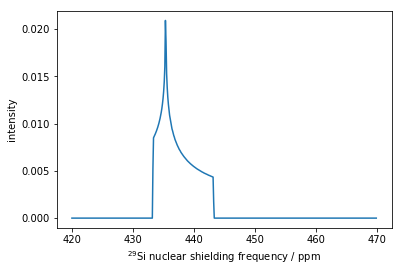

In [5]:
plt.plot(freq, amp)
plt.xlabel('$^{29}$Si nuclear shielding frequency / ppm')
plt.ylabel('intensity')
plt.show()